In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
stock = "AAPL"
start_date = "2010-01-01"
end_date = "2023-06-15"
stock_data = yf.download(stock, start=start_date, end=end_date, progress=False)

In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3385 entries, 2010-01-04 to 2023-06-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3385 non-null   float64
 1   High       3385 non-null   float64
 2   Low        3385 non-null   float64
 3   Close      3385 non-null   float64
 4   Adj Close  3385 non-null   float64
 5   Volume     3385 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.1 KB


In [4]:
# Drop NA
stock_data = stock_data.dropna()

In [5]:
def calculate_keltner_channel_bands(data, ema_period=20, atr_period=10, multiplier=2):
    # Exponential Moving Average (EMA)
    ema = data['Close'].ewm(span=ema_period, adjust=False).mean()

    # Average True Range (ATR)
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    atr = true_range.rolling(window=atr_period, min_periods=1).mean()

    # Keltner Channel
    upper_band = ema + (multiplier * atr)
    lower_band = ema - (multiplier * atr)

    return ema, upper_band, lower_band


In [6]:
# Keltner Channel figure for each year
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

start_year = start_date.year
end_year = end_date.year
total_years = end_year - start_year + 1

ema_period = 20
atr_period = 10
multiplier = 2

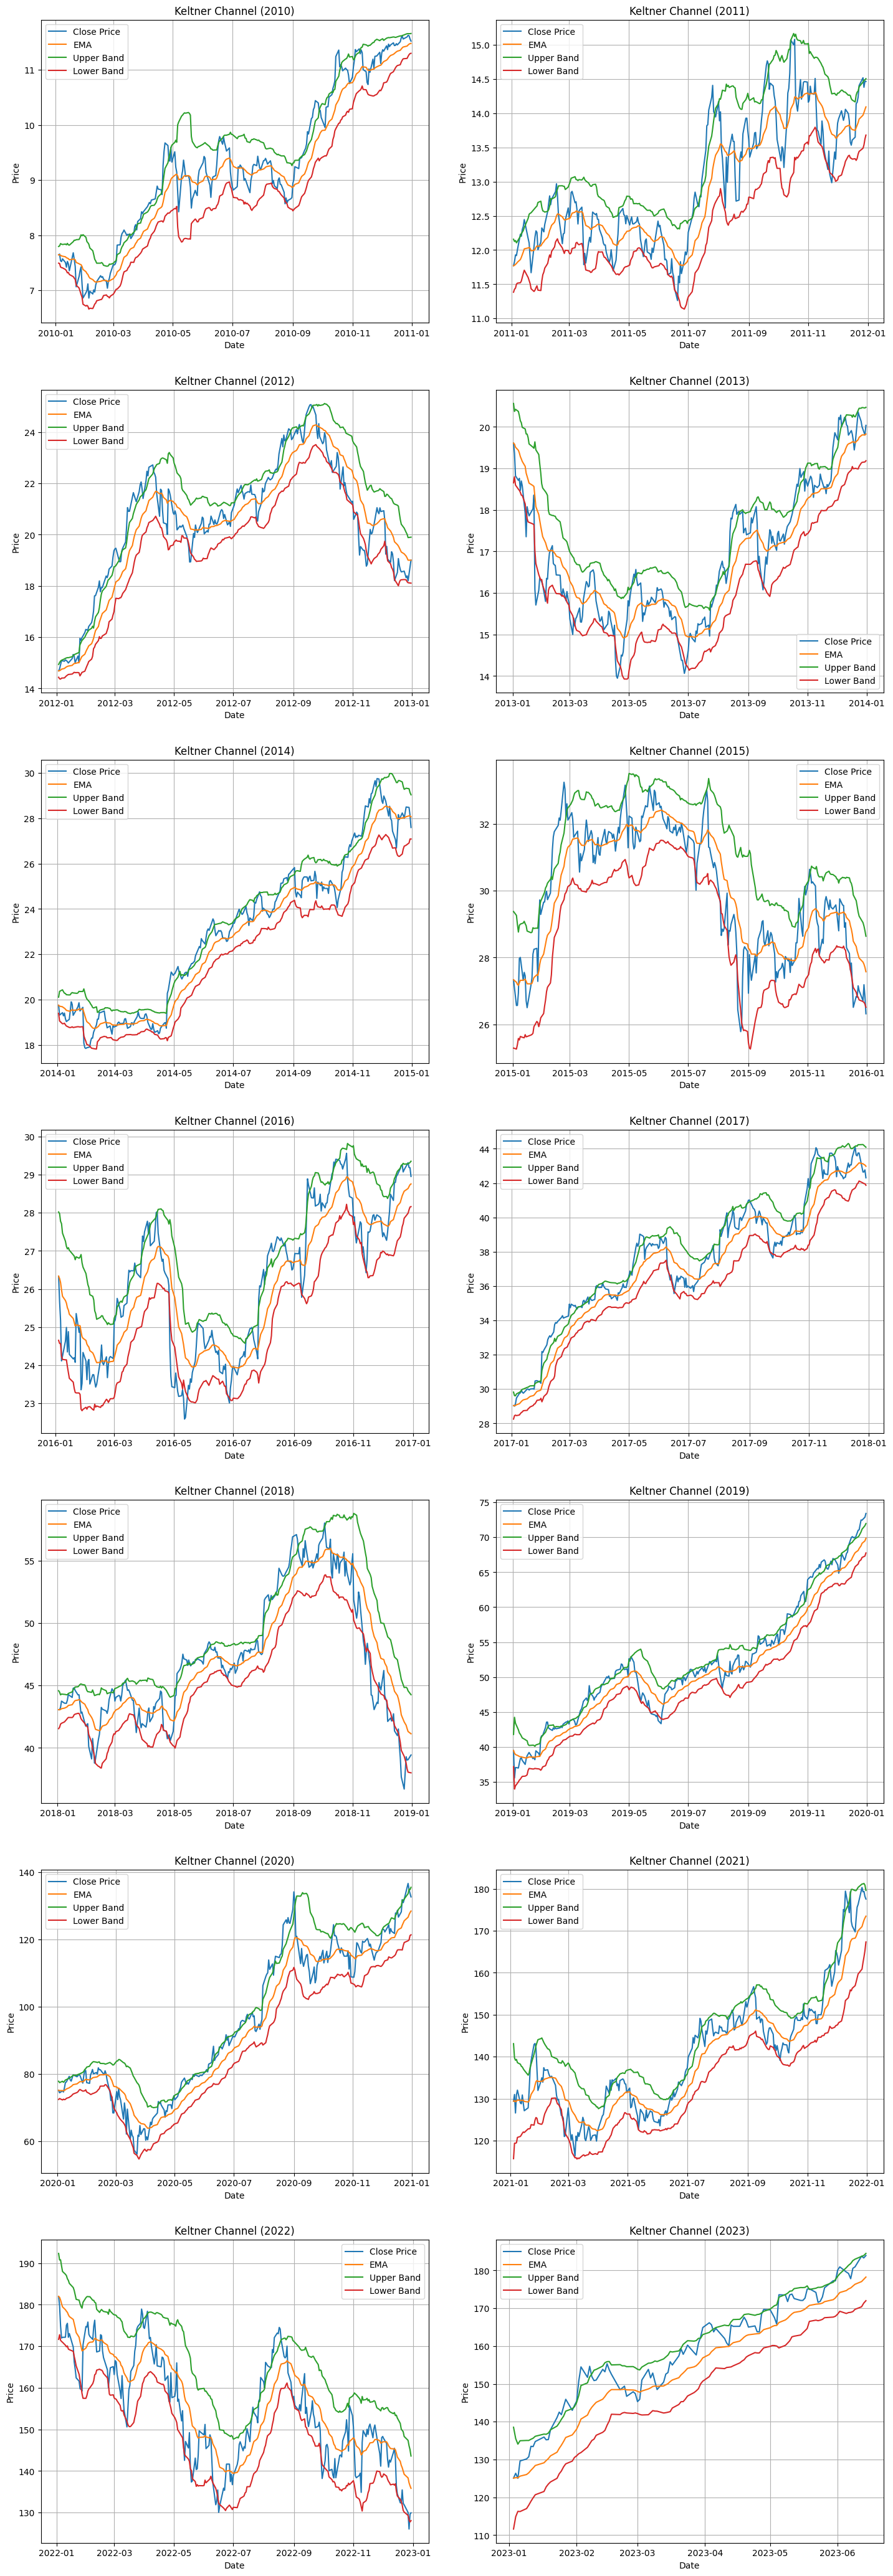

In [7]:
# Calculate the number of rows and columns for the subplot grid
num_rows = (total_years + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))

for j, year in enumerate(range(start_year, end_year + 1)):
    year_data = stock_data[stock_data.index.year == year]
    if year_data.empty:
        continue
    ema, upper_band, lower_band = calculate_keltner_channel_bands(year_data, ema_period, atr_period, multiplier)

    # Calculate subplot position
    row = j // num_cols
    col = j % num_cols

    # Plotting
    axs[row, col].plot(year_data.index, year_data['Close'], label='Close Price')
    axs[row, col].plot(year_data.index, ema, label='EMA')
    axs[row, col].plot(year_data.index, upper_band, label='Upper Band')
    axs[row, col].plot(year_data.index, lower_band, label='Lower Band')
    axs[row, col].set_title(f'Keltner Channel ({year})')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout(pad=3.0)
plt.show()


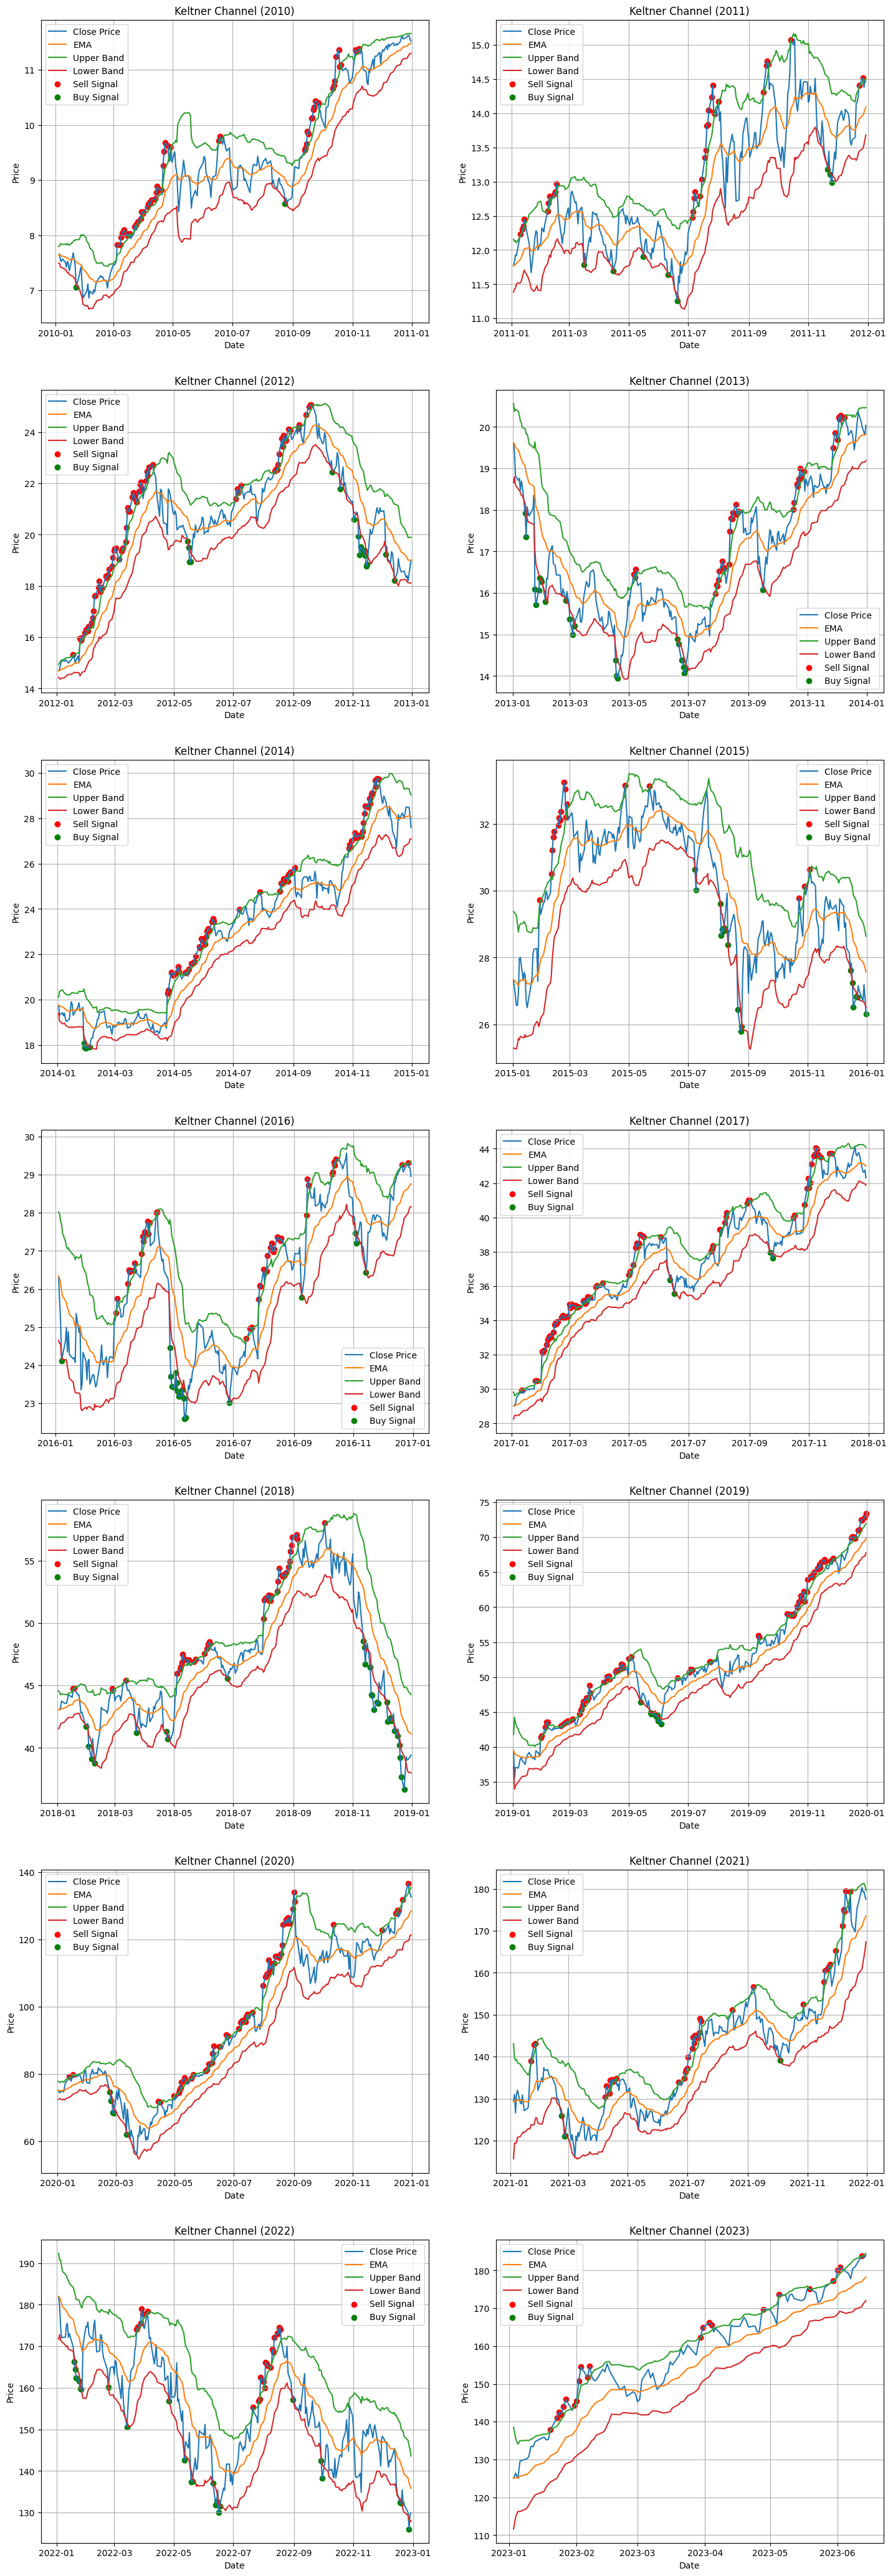

In [8]:
# Calculate the number of rows and columns for the subplot grid
num_rows = (total_years + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))

for i, year in enumerate(range(start_year, end_year + 1)):
    year_data = stock_data[stock_data.index.year == year]
    if year_data.empty:
        continue
    ema, upper_band, lower_band = calculate_keltner_channel_bands(year_data, ema_period, atr_period, multiplier)

    # Generate sell and buy signals
    sell_signals = year_data[year_data['Close'] > upper_band]['Close']
    buy_signals = year_data[year_data['Close'] < lower_band]['Close']

    # Calculate subplot position
    row = i // num_cols
    col = i % num_cols

    # Plotting
    axs[row, col].plot(year_data.index, year_data['Close'], label='Close Price')
    axs[row, col].plot(year_data.index, ema, label='EMA')
    axs[row, col].plot(year_data.index, upper_band, label='Upper Band')
    axs[row, col].plot(year_data.index, lower_band, label='Lower Band')
    axs[row, col].scatter(sell_signals.index, sell_signals, color='red', label='Sell Signal', marker='o')
    axs[row, col].scatter(buy_signals.index, buy_signals, color='green', label='Buy Signal', marker='o')
    axs[row, col].set_title(f'Keltner Channel ({year})')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout(pad=3.0)
plt.show()
